<a href="https://colab.research.google.com/github/AshikKarim/health_monitoring_system_using_ml/blob/main/Random_Forest_50_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
df= pd.read_csv('Training.csv')

In [3]:
test= pd.read_csv('Testing.csv')

In [4]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [5]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [6]:
df.dtypes

,0
itching,int64
skin_rash,int64
nodal_skin_eruptions,int64
continuous_sneezing,int64
shivering,int64
...,...
inflammatory_nails,int64
blister,int64
red_sore_around_nose,int64
yellow_crust_ooze,int64


In [7]:
df["prognosis"].value_counts()

,count
prognosis,
Fungal infection,120
Hepatitis C,120
Hepatitis E,120
Alcoholic hepatitis,120
Tuberculosis,120
Common Cold,120
Pneumonia,120
Dimorphic hemmorhoids(piles),120
Heart attack,120


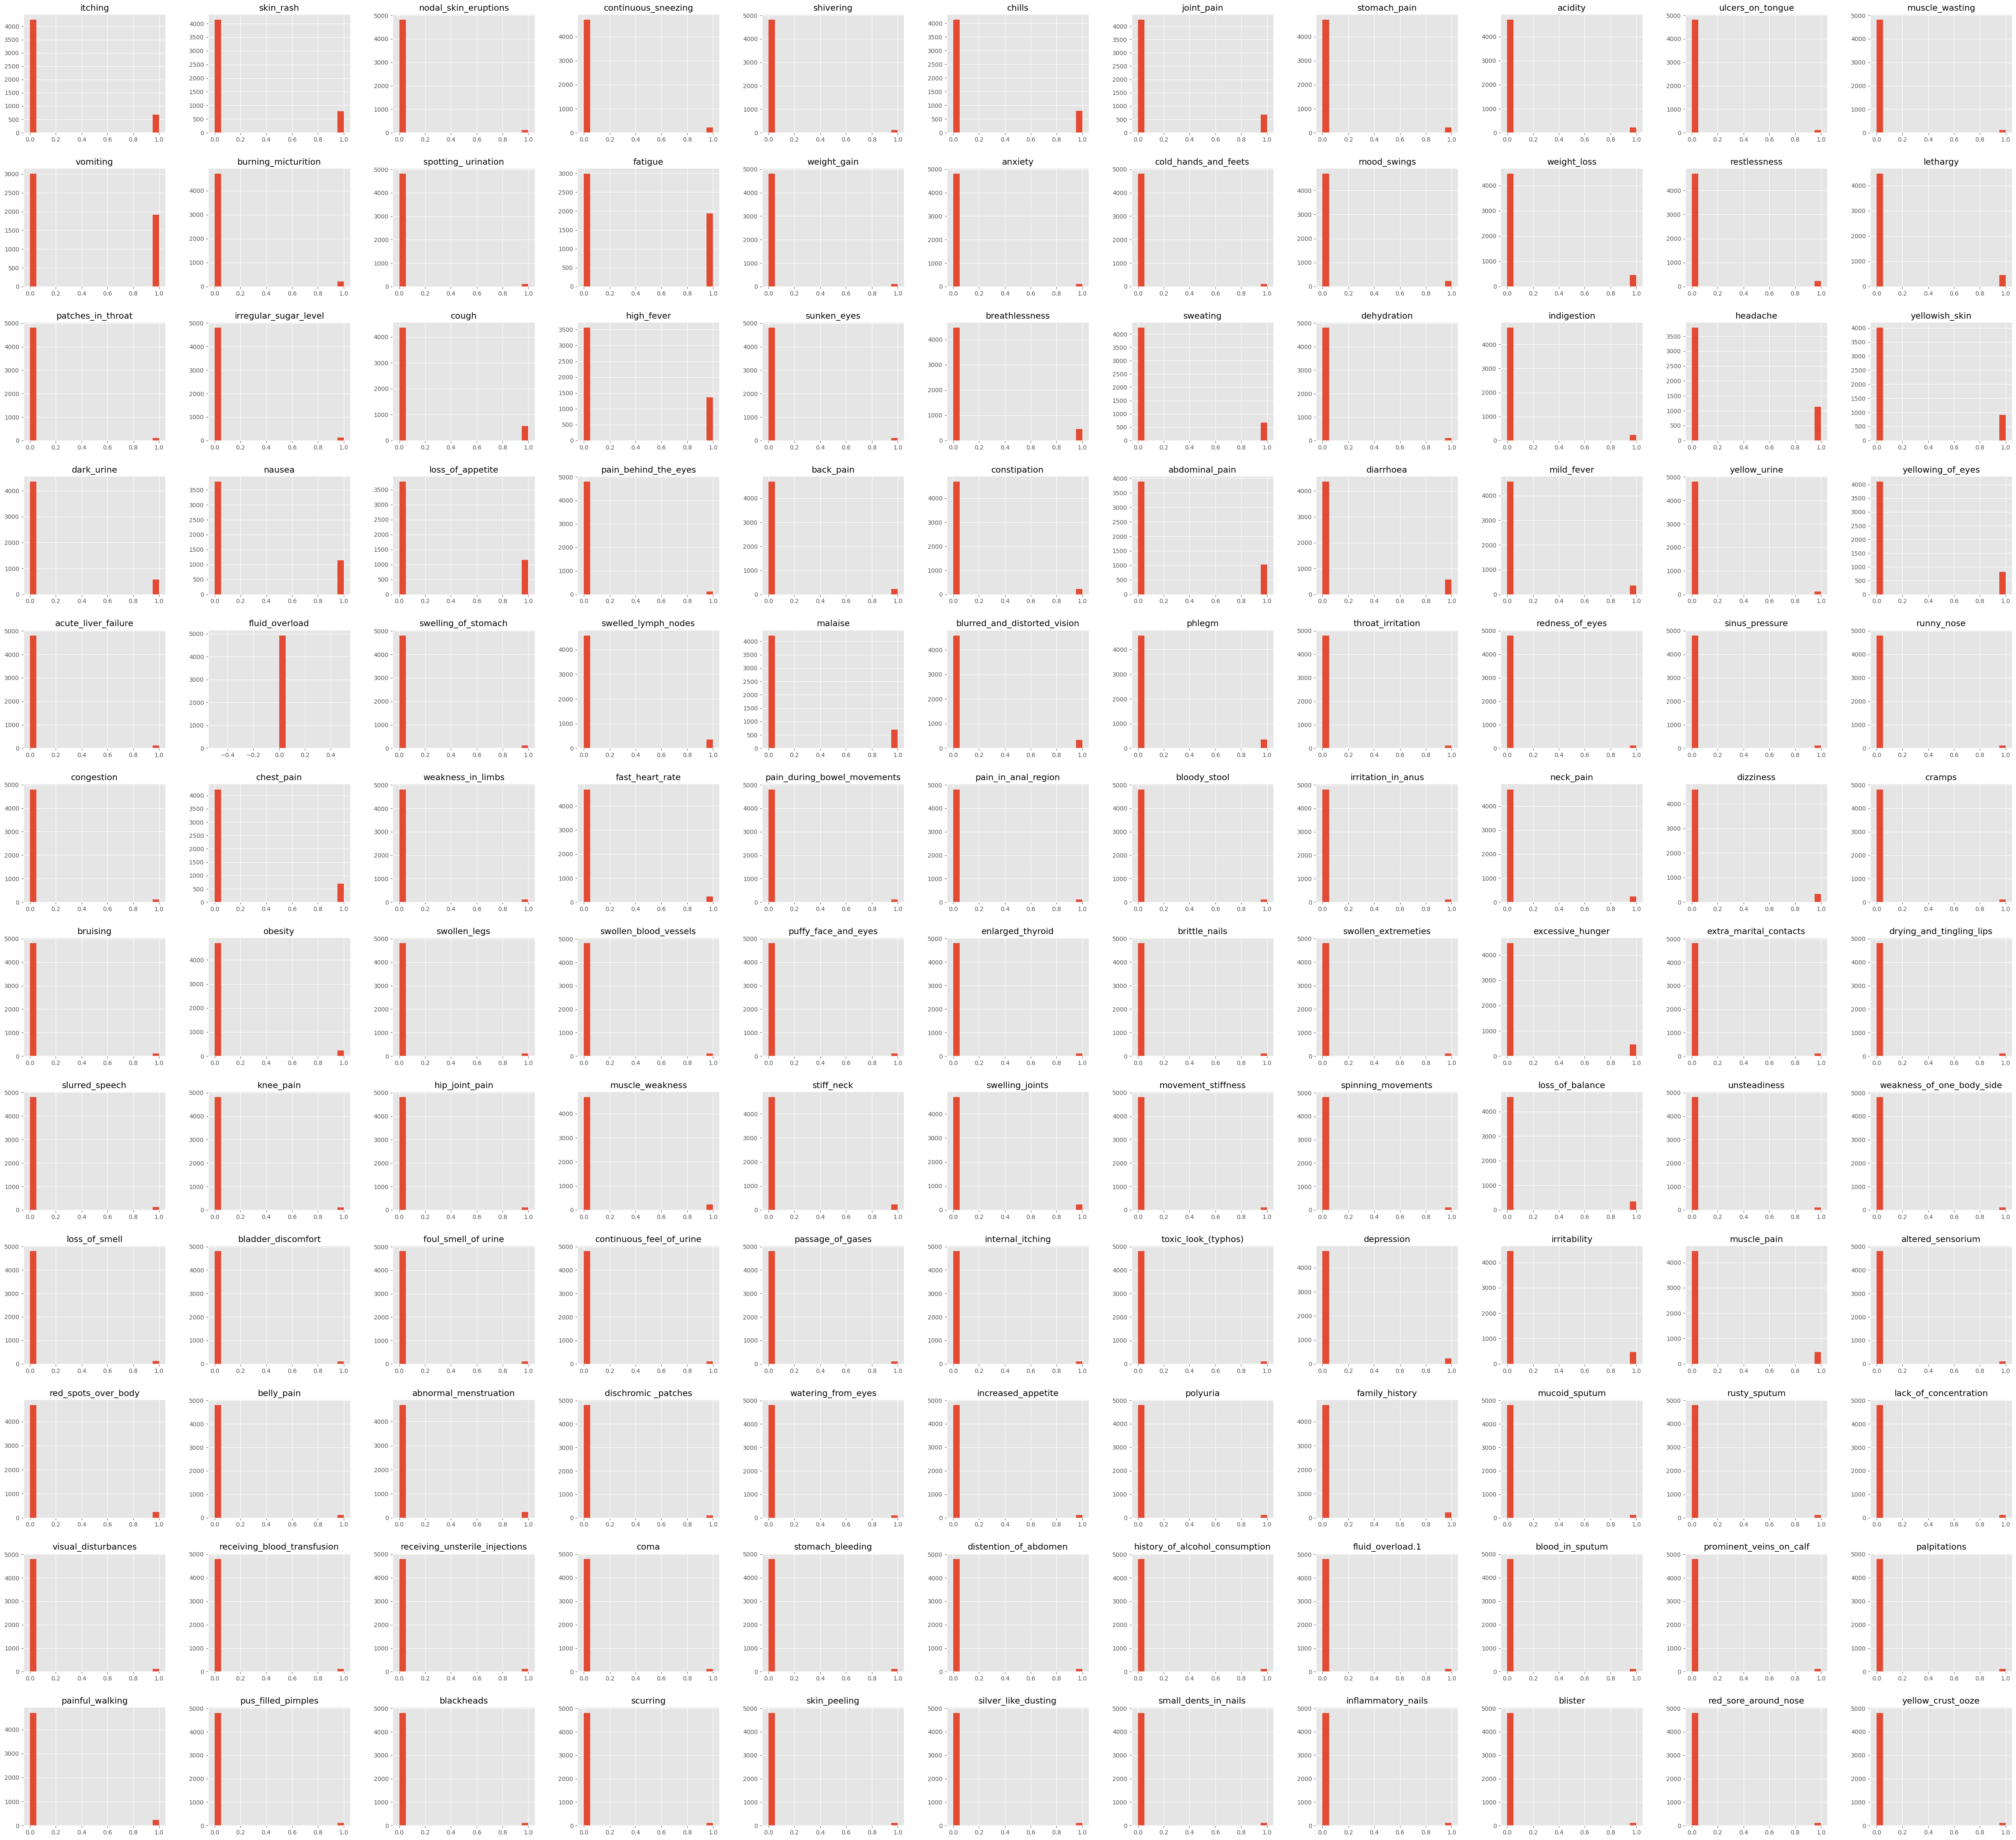

In [9]:
plt.style.use("ggplot")
df.hist(figsize =(60,55),bins=20)
plt.show()

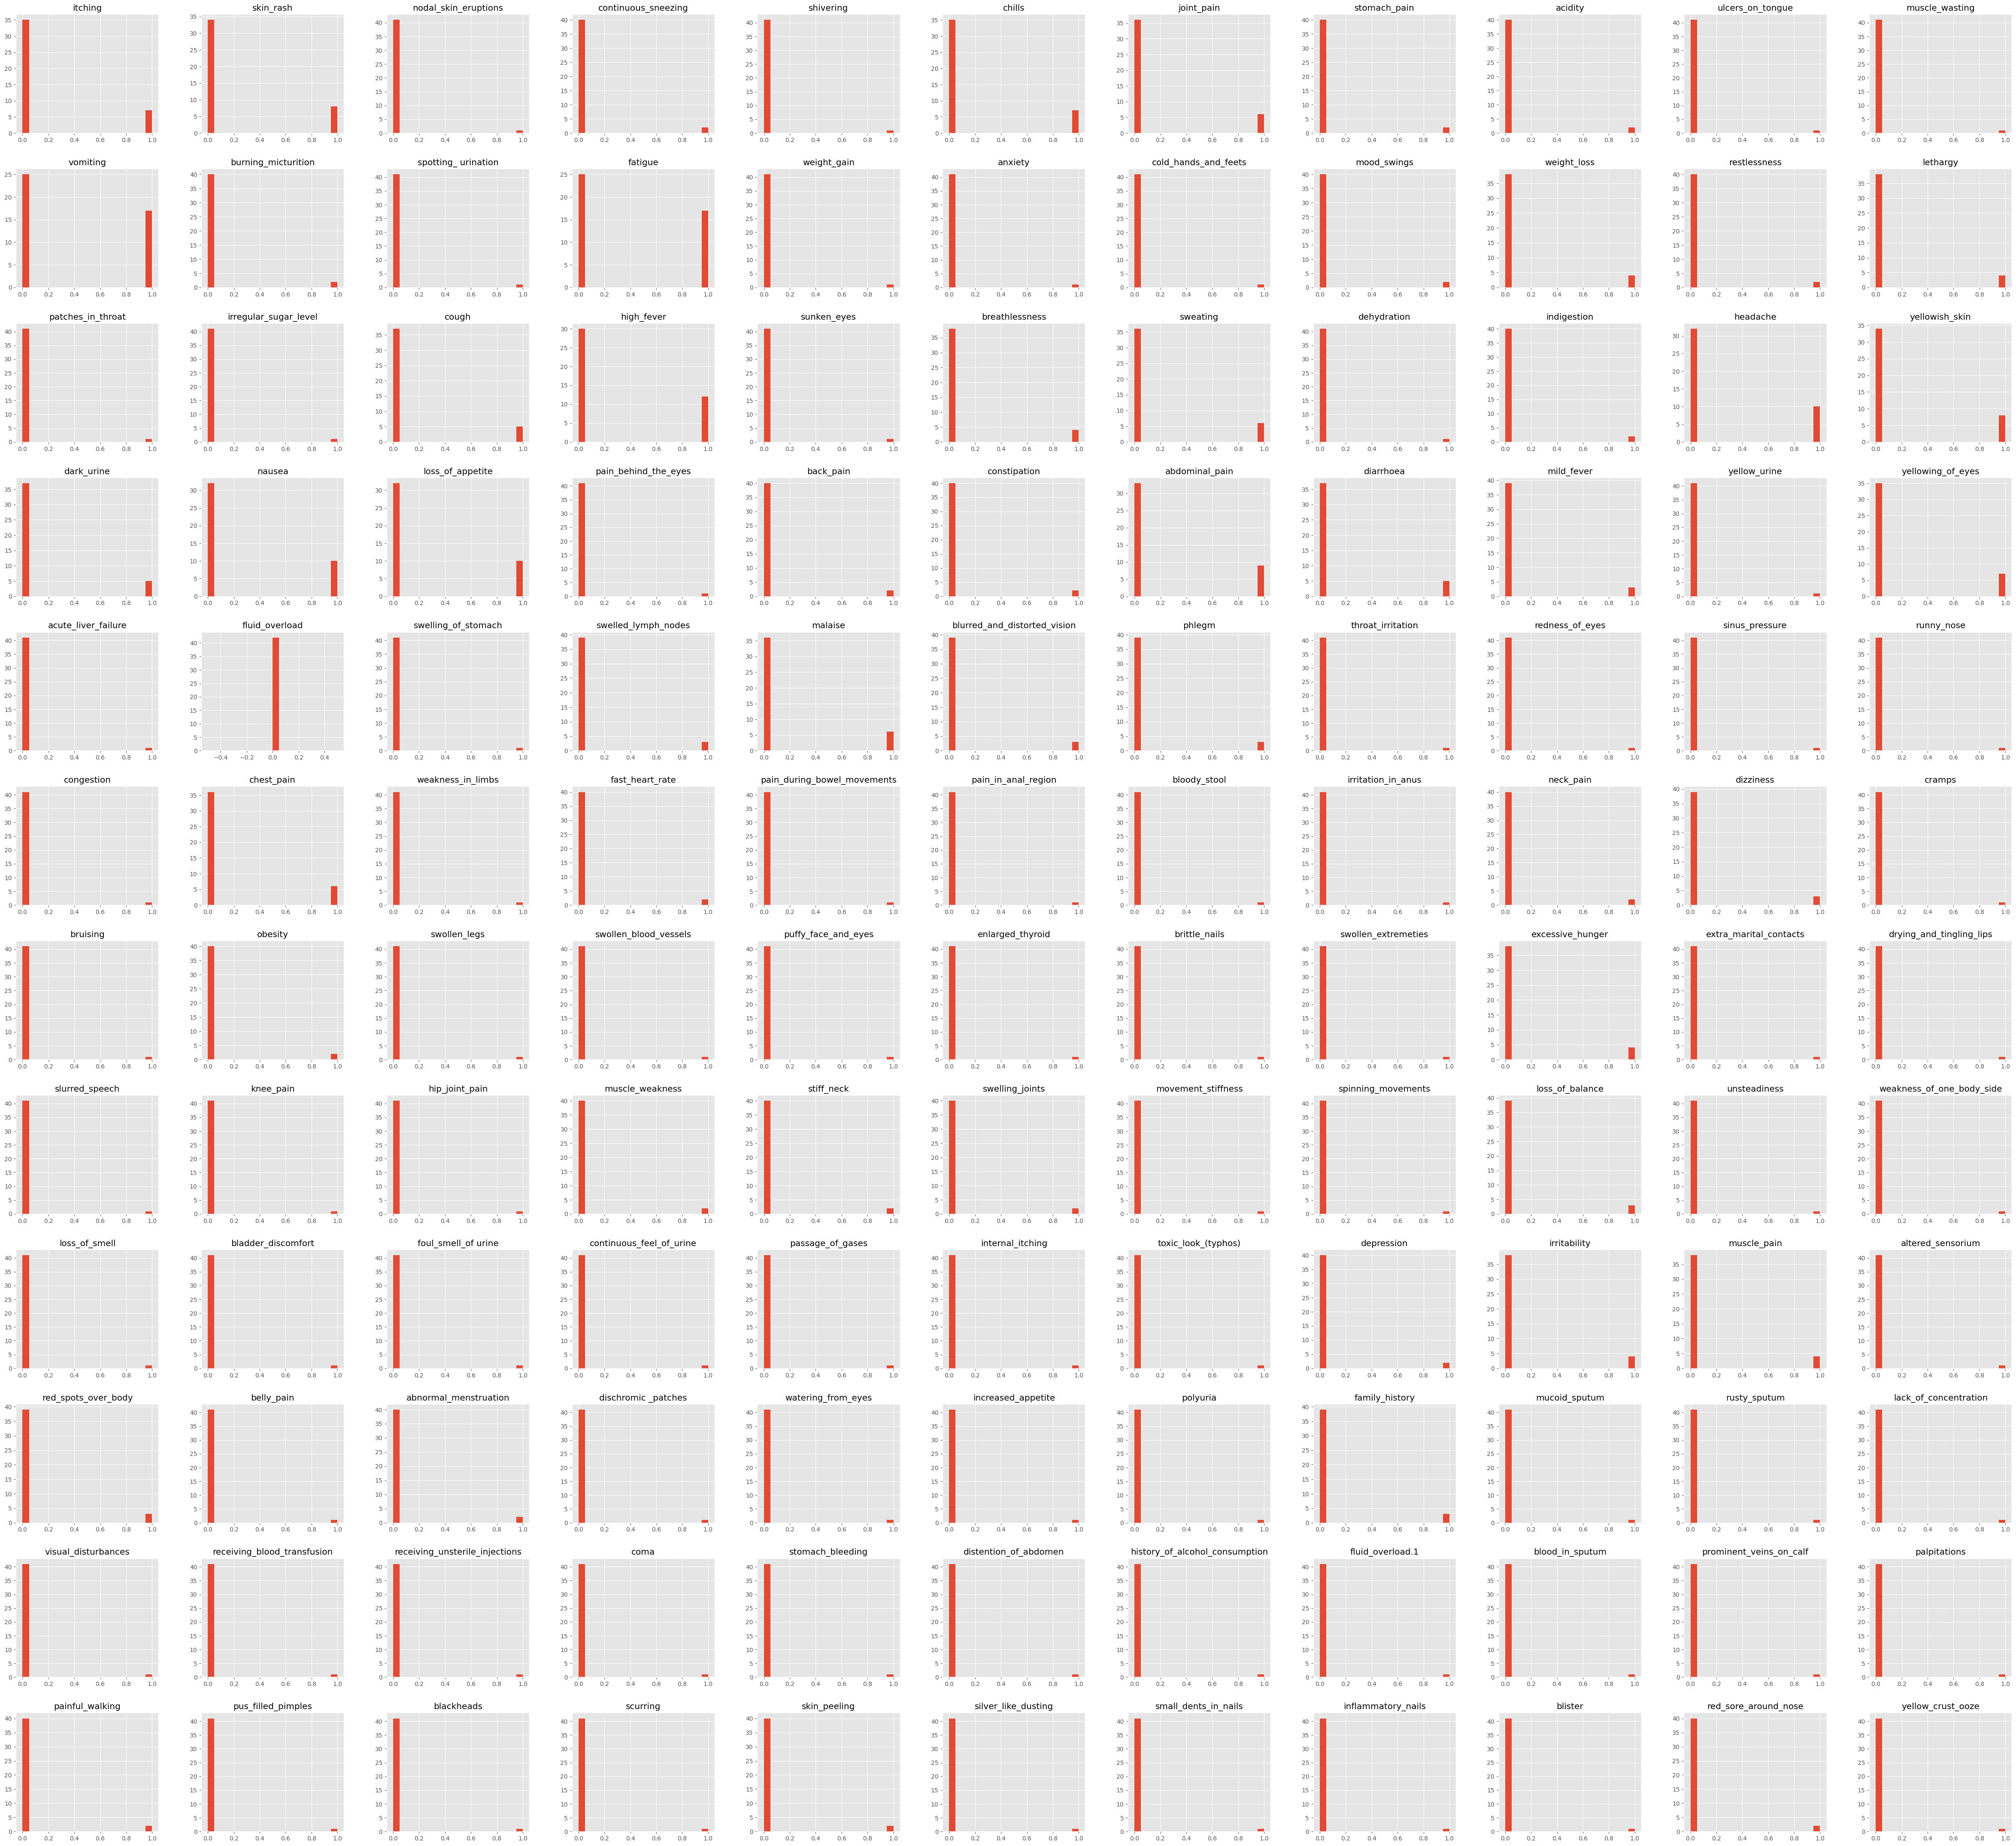

In [10]:
plt.style.use("ggplot")
test.hist(figsize =(60,55),bins=20)
plt.show()

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [15]:
X = df.drop(columns=["prognosis"])
y = df["prognosis"]

In [18]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [19]:
df.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y_encoded)

RandomForestClassifier(random_state=42)

In [23]:
importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df.head(50))

                            Feature  Importance
97                      muscle_pain    0.019439
0                           itching    0.016014
98                altered_sensorium    0.016001
33                       dark_urine    0.015811
25                       high_fever    0.015623
41                       mild_fever    0.015100
106                  family_history    0.014786
34                           nausea    0.014670
43                yellowing_of_eyes    0.014079
28                         sweating    0.013823
86                     unsteadiness    0.013589
56                       chest_pain    0.013119
14                          fatigue    0.012688
39                   abdominal_pain    0.012670
6                        joint_pain    0.012629
40                        diarrhoea    0.012459
109           lack_of_concentration    0.011938
99              red_spots_over_body    0.011681
35                 loss_of_appetite    0.011402
11                         vomiting    0

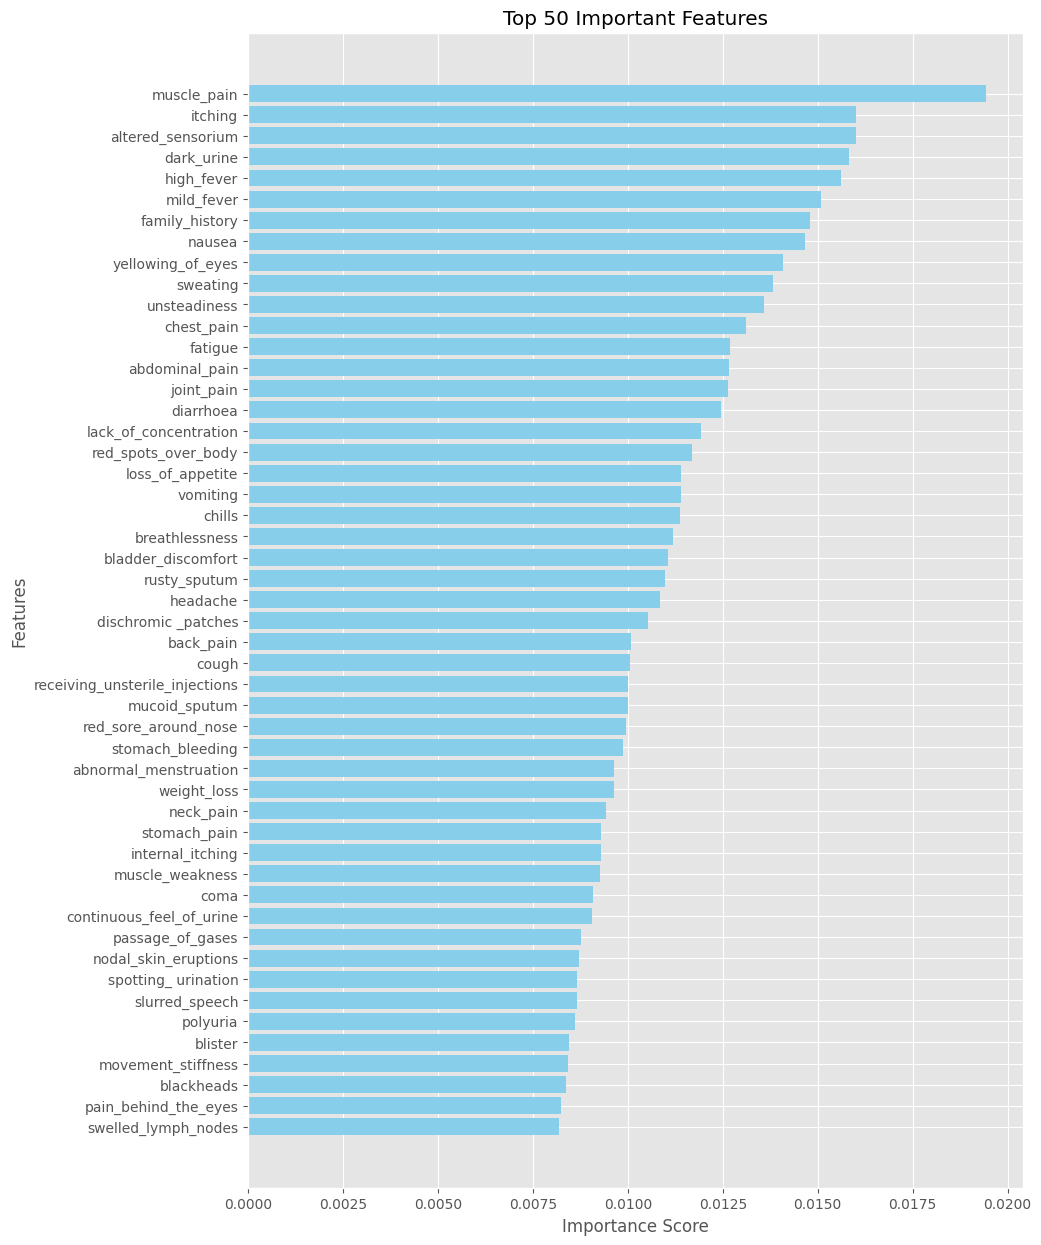

In [26]:
plt.figure(figsize=(10, 15))
plt.barh(importance_df["Feature"][:50], importance_df["Importance"][:50], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 50 Important Features")
plt.gca().invert_yaxis()
plt.show()

In [27]:
top_50_features = importance_df["Feature"].iloc[:50].values

X = df[top_50_features]
y = df["prognosis"]

In [49]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [50]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=le.classes_))
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")

Random Forest Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        32
                                   AIDS       1.00      0.95      0.97        39
                                   Acne       1.00      0.95      0.97        41
                    Alcoholic hepatitis       0.95      1.00      0.97        36
                                Allergy       1.00      0.89      0.94        35
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        44
                   Cervical spondylosis       0.97      1.00      0.98        32
                            Chicken pox       1.00      1.00      1.00        35
                    Chronic cholestasis       1.00      1.00      1.00        30
                            Common Cold       1.00      1.00      1.00 

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y_encoded, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.97052846 0.9745935  0.98780488 1.         1.        ]
Mean Accuracy: 0.9865853658536586


In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


test2 = test[top_50_features]

predictions_encoded = rf.predict(test2)
predictions = le.inverse_transform(predictions_encoded)

count = 0
for i, disease in enumerate(predictions):
    print(f"Row {i+1}: Predicted Disease - {disease}")
    if count == 10:
        break
    count += 1

Row 1: Predicted Disease - Fungal infection
Row 2: Predicted Disease - Allergy
Row 3: Predicted Disease - GERD
Row 4: Predicted Disease - Chronic cholestasis
Row 5: Predicted Disease - Drug Reaction
Row 6: Predicted Disease - Peptic ulcer diseae
Row 7: Predicted Disease - AIDS
Row 8: Predicted Disease - Diabetes 
Row 9: Predicted Disease - Gastroenteritis
Row 10: Predicted Disease - Bronchial Asthma
Row 11: Predicted Disease - Hypertension 


In [55]:
test["prognosis"].head(11)

,prognosis
0,Fungal infection
1,Allergy
2,GERD
3,Chronic cholestasis
4,Drug Reaction
5,Peptic ulcer diseae
6,AIDS
7,Diabetes
8,Gastroenteritis
9,Bronchial Asthma


In [56]:
predictions = le.inverse_transform(predictions_encoded)
test['predicted_prognosis'] = predictions

mismatches = (test['prognosis'] != test['predicted_prognosis'])
mismatch_count = mismatches.sum()

In [46]:
print(test[['prognosis', 'predicted_prognosis']].head(11))
print(f"Total mismatches: {mismatch_count} out of {len(test)} samples.")

              prognosis  predicted_prognosis
0      Fungal infection     Fungal infection
1               Allergy              Allergy
2                  GERD                 GERD
3   Chronic cholestasis  Chronic cholestasis
4         Drug Reaction        Drug Reaction
5   Peptic ulcer diseae  Peptic ulcer diseae
6                  AIDS                 AIDS
7             Diabetes             Diabetes 
8       Gastroenteritis      Gastroenteritis
9      Bronchial Asthma     Bronchial Asthma
10        Hypertension         Hypertension 
Total mismatches: 1 out of 42 samples.
